<h1><center>Stock Market Trading Bot</center></h1>

# Table of contents
* [Introduction: Business Problem](#introduction)
* [OHLC Data]() 
    * [Loading Data](#OHLC_Load)
    * [Plotting Data](#Plt)
    * [Descriptive Statistics](#desc)
    * [Inferential Statistics](#Inf)
    * [Trading FrameWork](#Tf)
    * [Trade Log](#Tl)
    * [Unit Testing](#Ut)
* [Per Trade Data]()
    * [Loading Data](#pt)
    * [Combining Date Time](#dt)

# Importing libraries

In [1]:
! pip install plotly

In [2]:
import csv
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt

# Data Source

[Data Source](https://www.kaggle.com/ghazanfarali/ksedataset?select=UBL.csv) 
[Data Source](https://www.kaggle.com/arsalanjaved/pakistan-stock-exchange)

# Loading data <a name='OHLC_Load'></a>

In [3]:
UBL=pd.read_csv('Data/UBL.csv',index_col='Date',parse_dates=True)
HBL=pd.read_csv('Data/HBL.csv',index_col='Date',parse_dates=True)
NBP=pd.read_csv('Data/NBP.csv',index_col='Date',parse_dates=True)
MEBL=pd.read_csv('Data/MEBL.csv',index_col='Date',parse_dates=True)
UBL.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2005-05-26,UBL,61.25,68.00,59.10,59.85,1990000
2005-05-27,UBL,60.00,61.40,58.60,59.40,573700
2005-05-30,UBL,59.00,59.75,56.45,58.40,1026700
2005-05-31,UBL,57.50,58.50,57.10,58.35,684500
2005-06-01,UBL,58.50,61.20,58.15,60.75,1103500


# Plotting Data <a name='Plt'></a>

Text(0.5, 1.0, 'Trend of Share Price of different KSE-30 Companies')

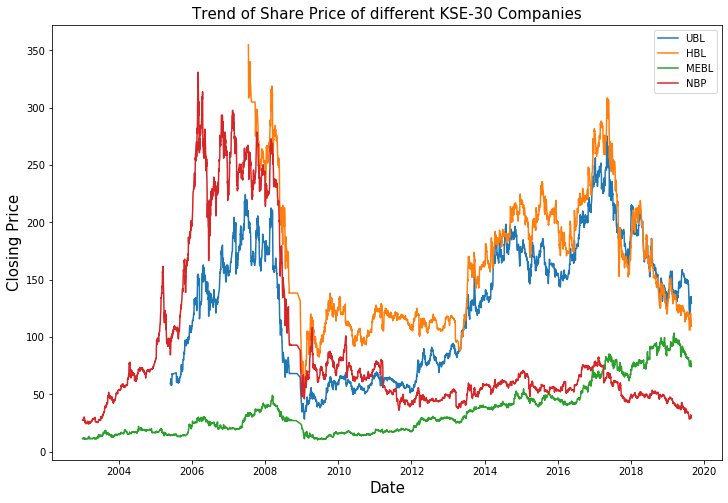

In [4]:
plt.figure(figsize=(12,8))
sns.lineplot(data=UBL.Close,label='UBL')
sns.lineplot(data=HBL.Close,label='HBL')
sns.lineplot(data=MEBL.Close,label='MEBL')
sns.lineplot(data=NBP.Close,label='NBP')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Trend of Share Price of different KSE-30 Companies',fontsize=15)

## Dropping redundant feature

In [5]:
UBL.drop('Symbol',axis=1,inplace=True)
MEBL.drop('Symbol',axis=1,inplace=True)
NBP.drop('Symbol',axis=1,inplace=True)
HBL.drop('Symbol',axis=1,inplace=True)

## Changing column names in order to facilitate merge

In [6]:
UBL.columns=['UBL_Open','UBL_High','UBL_Low','UBL_Close','UBL_Volume']
MEBL.columns=['MEBL_Open','MEBL_High','MEBL_Low','MEBL_Close','MEBL_Volume']
HBL.columns=['HBL_Open','HBL_High','HBL_Low','HBL_Close','HBL_Volume']


## Merging Data Frame

In [7]:
data=pd.concat([UBL,MEBL,HBL],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4055 entries, 2003-01-01 to 2019-08-30
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UBL_Open     3449 non-null   float64
 1   UBL_High     3449 non-null   float64
 2   UBL_Low      3449 non-null   float64
 3   UBL_Close    3449 non-null   float64
 4   UBL_Volume   3449 non-null   float64
 5   MEBL_Open    3986 non-null   float64
 6   MEBL_High    3986 non-null   float64
 7   MEBL_Low     3986 non-null   float64
 8   MEBL_Close   3986 non-null   float64
 9   MEBL_Volume  3986 non-null   float64
 10  HBL_Open     2948 non-null   float64
 11  HBL_High     2948 non-null   float64
 12  HBL_Low      2948 non-null   float64
 13  HBL_Close    2948 non-null   float64
 14  HBL_Volume   2948 non-null   float64
dtypes: float64(15)
memory usage: 506.9 KB


## Reversing Data Frame

In [8]:
data1=data.iloc[::-1]
data1=data1.reset_index()
data1=data1.iloc[::-1]
data1=data1.set_index('Date')

In [9]:
x=data1

In [10]:
x.head()

,UBL_Open,UBL_High,UBL_Low,UBL_Close,UBL_Volume,MEBL_Open,MEBL_High,MEBL_Low,MEBL_Close,MEBL_Volume,HBL_Open,HBL_High,HBL_Low,HBL_Close,HBL_Volume
Date,,,,,,,,,,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,11.5,11.60,11.5,11.55,11500.0,NaN,NaN,NaN,NaN,NaN
2003-01-02,NaN,NaN,NaN,NaN,NaN,11.5,11.90,11.5,11.80,16500.0,NaN,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN,NaN,11.7,11.85,11.7,11.85,6500.0,NaN,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN,NaN,11.6,11.85,11.6,11.85,11500.0,NaN,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN,NaN,11.6,11.60,11.6,11.60,5000.0,NaN,NaN,NaN,NaN,NaN


## Dropping Missing Values

In [11]:
data1.dropna(inplace=True)

In [12]:
data1.isnull().sum().sum()

0

# Descriptive Statistics <a name='desc'></a>

In [13]:
data2=data1.loc[:,['UBL_Close','MEBL_Close','HBL_Close']]

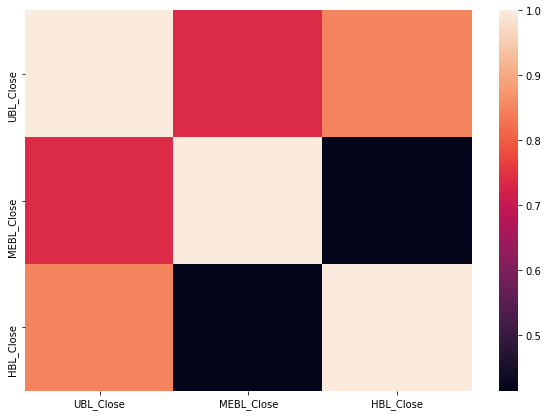

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data2.corr())

## Box plot

Text(0.5, 1.0, 'Trend of Share Price of different KSE-30 Companies')

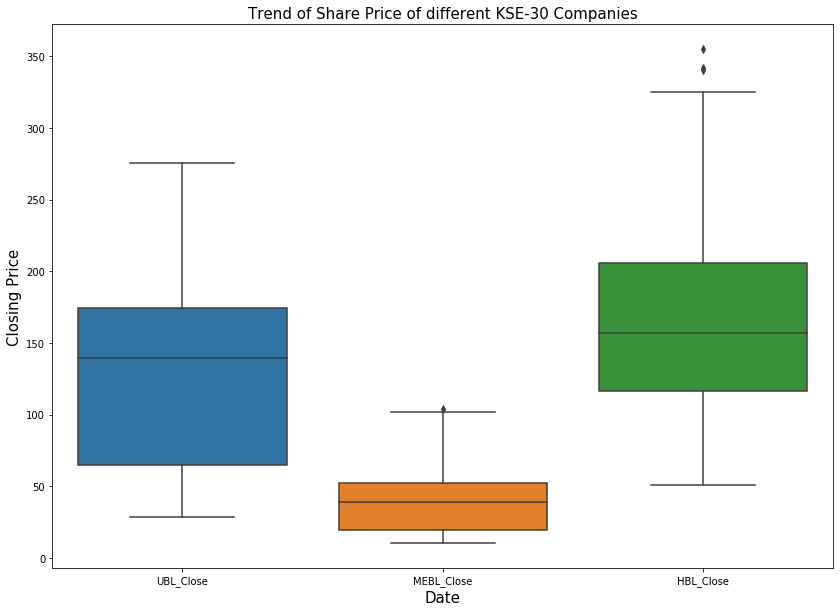

In [15]:
plt.figure(figsize=(14,10))
sns.boxplot(data=data2)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Trend of Share Price of different KSE-30 Companies',fontsize=15)

# Inferential Statistics <a name='Inf'></a>

## Pearson Correlation

In [16]:
pearson_coeff,p_val=stats.pearsonr(data2['UBL_Close'],data2['HBL_Close'])
pearson_coeff,p_val

(0.8491742742578102, 0.0)

**_Conclusion:_**

Since the p-value is <
0.001, the correlation between UBL Stock Closing Price and HBL Stock Closing Price is statistically significant, and the linear relationship is quite strong (~0.834).

In [17]:
pearson_coeff,p_val=stats.pearsonr(data2['UBL_Close'],data2['MEBL_Close'])
pearson_coeff,p_val

(0.7386514218064881, 0.0)

**_Conclusion:_**

Since the p-value is <
0.001, the correlation between UBL Stock Closing Price and HBL Stock Closing Price is statistically significant, and the linear relationship is quite strong (~0.738).

In [18]:
pearson_coeff,p_val=stats.pearsonr(data2['MEBL_Close'],data2['HBL_Close'])
pearson_coeff,p_val

(0.41403618176489365, 8.944308697478978e-120)

# Trading Frame Work <a name='Tf'></a>

In [19]:
def trader(X,nS1,nS3,share_price1,share_price2):
    Amount_Gained=((nS3*share_price2)*.1)
    Brocker_fee=((nS3*share_price2)*.1)*.3*.01
    nS3=nS3-(nS3*.1)
    X=X+Amount_Gained-Brocker_fee
    Shares_bought=(.997*Amount_Gained)/share_price1
    nS1=nS1+Shares_bought
    X=X-(.997*Amount_Gained)
    return X,nS1,nS3,Amount_Gained,-(Shares_bought*share_price1),Brocker_fee

## Refactored Code

In [20]:
def stock1(X,nS1,nS2,nS3,pS1,pS2,pS3,share_prices,Prediction,TN,low_thres,high_thres):
    Trade_Occurred,Brocker_fee,Share1,Share2,Share3,temp1,temp2,temp3=False,0,0,0,0,0,0,0
    if (pS3/TN)>low_thres and (pS2/TN)>low_thres:
            X,nS1,nS3,temp1,temp2,temp3=trader(X,nS1,nS3,share_price[0],share_price[2])
            Share3+=temp1
            Share1+=temp2
            Brocker_fee+=temp3
            X,nS1,nS2,temp1,temp2,temp3=trader(X,nS1,nS2,share_price[0],share_price[1])
            Share2+=temp1
            Share1+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    elif (model2_pred>model3_pred) and (pS3/TN)>low_thres:
            X,nS1,nS3,temp1,temp2,temp3=trader(X,nS1,nS3,share_price[0],share_price[2])
            Share3+=temp1
            Share1+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    elif (model3_pred>model2_pred) and (pS2/TN)>low_thres:
            X,nS1,nS2,temp1,temp2,temp3=trader(X,nS1,nS2,share_price[0],share_price[1])
            Share2+=temp1
            Share1+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    if model2_pred<0 and (pS2/TN)>low_thres:
            X,nS1,nS2,temp1,temp2,temp3=trader(X,nS1,nS2,share_price[0],share_price[1])
            Share2+=temp1
            Share1+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    if model3_pred<0 and (pS3/TN)>low_thres:
            X,nS1,nS3,temp1,temp2,temp3=trader(X,nS1,nS3,share_price[0],share_price[2])   
            Share3+=temp1
            Share1+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee

In [21]:
def stock2(X,nS1,nS2,nS3,pS1,pS2,pS3,share_prices,Prediction,TN,low_thres,high_thres):
    Trade_Occurred,Brocker_fee,Share1,Share2,Share3,temp1,temp2,temp3=False,0,0,0,0,0,0,0
    if (pS3/TN)>low_thres and (pS2/TN)>low_thres:
            X,nS2,nS3,temp1,temp2,temp3=trader(X,nS2,nS3,share_price[1],share_price[2])
            Share3+=temp1
            Share2+=temp2
            Brocker_fee+=temp3
            X,nS2,nS1,temp1,temp2,temp3=trader(X,nS2,nS1,share_price[1],share_price[0])
            Share1+=temp1
            Share2+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    elif (model1_pred>model3_pred) and (pS3/TN)>low_thres:
            X,nS2,nS3,temp1,temp2,temp3=trader(X,nS2,nS3,share_price[1],share_price[2])
            Share3+=temp1
            Share2+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    elif (model3_pred>model2_pred) and (pS1/TN)>low_thres:
            X,nS2,nS1,temp1,temp2,temp3=trader(X,nS2,nS1,share_price[1],share_price[0])
            Share1+=temp1
            Share2+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    if model1_pred<0 and (pS1/TN)>low_thres:
            X,nS2,nS1,temp1,temp2,temp3=trader(X,nS2,nS1,share_price[1],share_price[0])
            Share1+=temp1
            Share2+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    if model3_pred<0 and (pS3/TN)>low_thres:
            X,nS2,nS3,temp1,temp2,temp3=trader(X,nS2,nS3,share_price[1],share_price[2])
            Share3+=temp1
            Share2+=temp2
            Brocker_fee+=temp3
            Trade_Occurred=True
    return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee    

In [22]:
def stock3(X,nS1,nS2,nS3,pS1,pS2,pS3,share_prices,Prediction,TN,low_thres,high_thres):
    Trade_Occurred,Brocker_fee,Share1,Share2,Share3,temp1,temp2,temp3=False,0,0,0,0,0,0,0
    if (pS3/TN)>low_thres and (pS2/TN)>low_thres:
        X,nS3,nS1,temp1,temp2,temp3=trader(X,nS3,nS1,share_price[2],share_price[0])
        Share1+=temp1
        Share3+=temp2
        Brocker_fee+=temp3
        X,nS3,nS2,temp1,temp2,temp3=trader(X,nS3,nS2,share_price[2],share_price[1])
        Share2+=temp1
        Share3+=temp2
        Brocker_fee+=temp3
        Trade_Occurred=True
    elif (model2_pred>model1_pred) and (pS1/TN)>low_thres:
        X,nS3,nS1,temp1,temp2,temp3=trader(X,nS3,nS1,share_price[2],share_price[0])
        Share1+=temp1
        Share3+=temp2
        Brocker_fee+=temp3
        Trade_Occurred=True
    elif (model1_pred>model2_pred) and (pS2/TN)>low_thres:
        X,nS3,nS2,temp1,temp2,temp3=trader(X,nS3,nS2,share_price[2],share_price[1])
        Share2+=temp1
        Share3+=temp2
        Brocker_fee+=temp3
        Trade_Occurred=True
    if model2_pred<0 and (pS2/TN)>low_thres:
        X,nS3,nS2,temp1,temp2,temp3=trader(X,nS3,nS2,share_price[2],share_price[1])
        Share2+=temp1
        Share3+=temp2
        Brocker_fee+=temp3
        Trade_Occurred=True
    if model1_pred<0 and (pS1/TN)>low_thres:
        X,nS3,nS1,temp1,temp2,temp3=trader(X,nS3,nS1,share_price[2],share_price[0])
        Share1+=temp1
        Share3+=temp2
        Brocker_fee+=temp3
        Trade_Occurred=True
    return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee

In [23]:
def shares_trading(X,nS1,nS2,nS3,share_prices,Prediction,TN,low_thres,high_thres):
    model1_pred,model2_pred,model3_pred=Prediction[0],Prediction[1],Prediction[2]
    pS1,pS2,pS3=(nS1*share_prices[0]),(nS2*share_prices[1]),(nS3*share_prices[2])
    Trade_Occurred,Brocker_fee,Share1,Share2,Share3=False,0,0,0,0
    if (model1_pred>model2_pred and model1_pred>model3_pred) and (pS1/TN)<high_thres:
        X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee=stock1(X,nS1,nS2,nS3,pS1,pS2,pS3,
                                                                      share_prices,Prediction,TN,
                                                                      low_thres,high_thres)
        return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee
    
    elif (model2_pred>model1_pred and model2_pred>model3_pred) and (pS2/TN)<high_thres:
        X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee=stock2(X,nS1,nS2,nS3,pS1,pS2,pS3,
                                                                      share_prices,Prediction,TN,
                                                                      low_thres,high_thres)
        return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee
    elif (model3_pred>model1_pred and model3_pred>model2_pred) and (pS3/TN)<high_thres:
        X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee=stock3(X,nS1,nS2,nS3,pS1,pS2,pS3,
                                                                      share_prices,Prediction,TN,
                                                                      low_thres,high_thres)
        return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee
    else:
        Amount_Gained,Brocker_Fee=0,0
        return X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee


## Front End of Trading Framework

In [20]:
%matplotlib notebook
plt.rcParams['animation.html']='jshtml'

In [ ]:
data1.index=data1.index.astype('str')
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
i=0
x,y=[],[]
x1,y1=[],[]
x2,y2=[],[]
while True:
    x.append(data1.index[i])
    y.append(data1.UBL_Close[i])
    x1.append(data1.index[i])
    y1.append(data1.HBL_Close[i])
    x2.append(data1.index[i])
    y2.append(data1.MEBL_Close[i])
    ax.plot(x,y,color='blue')
    ax.plot(x1,y1,color='green')
    ax.plot(x2,y2,color='purple')
    plt.xticks(rotation=90)
    ax.legend(['UBL','HBL','MEBL'],loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock_Price')
    ax.set_title('Variations of Stock Prices over time')
    plt.show()
    fig.canvas.draw()
    time.sleep(1)
    i+=1

## Clonning DataFrame 

In [24]:
data3=data1.reset_index()
data3=data3.loc[0:,:]
data3.reset_index(inplace=True)
data3.drop('index',inplace=True,axis=1)
data3

,Date,UBL_Open,UBL_High,UBL_Low,UBL_Close,UBL_Volume,MEBL_Open,MEBL_High,MEBL_Low,MEBL_Close,MEBL_Volume,HBL_Open,HBL_High,HBL_Low,HBL_Close,HBL_Volume
0,2007-07-16,207.0,207.20,200.00,202.95,1749900.0,32.60,34.50,31.35,33.45,767500.0,350.00,375.00,350.00,355.00,2975400.0
1,2007-07-17,204.5,205.00,200.00,203.00,716300.0,33.50,33.95,32.50,33.95,177500.0,357.60,359.85,337.25,341.40,2420100.0
2,2007-07-18,202.0,202.50,193.00,195.00,1156500.0,33.00,34.40,32.30,32.50,189500.0,334.50,336.95,324.35,324.35,2029100.0
3,2007-07-19,197.0,198.95,193.00,197.50,1034200.0,32.70,32.70,30.90,31.85,155500.0,321.00,322.90,308.15,308.50,2176800.0
4,2007-07-20,192.0,199.35,192.00,196.35,1933600.0,31.90,31.90,30.35,31.00,200000.0,305.05,319.00,305.00,317.30,2019600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,2019-08-26,132.0,132.50,130.13,130.53,1115900.0,77.00,77.00,74.50,75.32,139500.0,117.00,117.95,114.15,115.93,184900.0
2878,2019-08-27,132.0,133.00,127.02,132.53,932200.0,75.32,75.50,73.01,74.02,691000.0,115.00,115.89,110.75,113.53,1512700.0
2879,2019-08-28,132.9,137.25,132.25,135.23,1200800.0,74.24,77.50,73.55,76.52,825500.0,113.89,115.40,113.00,113.25,663400.0
2880,2019-08-29,133.1,136.00,132.00,132.72,466900.0,77.40,78.00,75.00,75.29,184000.0,114.00,115.00,110.00,110.74,690400.0


## Creating Data Frame to Record Files into Excel Sheet

In [25]:
Data_Acquired=pd.DataFrame({'Time_Stamp':['2009-06-18','2009-06-18'],'UBL_Shares':[0,162],'HBL_Shares':[0,92],'MEBL_Shares':[0,986],'Trade_Ocurred':[False,True],
                            'UBL_Pred':[0,0],'HBL_Pred':[0,0],'MEBL_Pred':[0,0],'UBL_portfolio':[0,.33],
                            'HBL_portfolio':[0,.33],'MEBL_portfolio':[0,.33],'Balance':[100000,109],'Brocker_Fee':[0,(99000*.3*.01*3)]
                            ,'Share1_NetChange':[0,-33000],'Share2_NetChange':[0,-33000],'Share3_NetChange':[0,-33000],'TN':[100000,99109]})
Data_Acquired['Time_Stamp']=pd.to_datetime(Data_Acquired['Time_Stamp'],format='%Y-%m-%d')
Data_Acquired.to_csv('Trade_log.csv',index=None)

In [26]:
Data_Acquired

,Time_Stamp,UBL_Shares,HBL_Shares,MEBL_Shares,Trade_Ocurred,UBL_Pred,HBL_Pred,MEBL_Pred,UBL_portfolio,HBL_portfolio,MEBL_portfolio,Balance,Brocker_Fee,Share1_NetChange,Share2_NetChange,Share3_NetChange,TN
0,2009-06-18,0,0,0,False,0,0,0,0.00,0.00,0.00,100000,0.0,0,0,0,100000
1,2009-06-18,162,92,986,True,0,0,0,0.33,0.33,0.33,109,891.0,-33000,-33000,-33000,99109


# Unit Testing <a name='Ut'></a>

In [27]:
X=100000
nS1=math.floor((X*.33)/data3.loc[0,'UBL_Close'])
nS2=math.floor((X*.33)/data3.loc[0,'HBL_Close'])
nS3=math.floor((X*.33)/data3.loc[0,'MEBL_Close'])
X-=X*.99+(891)
X,nS1,nS2,nS3

(109.0, 162, 92, 986)

In [28]:
X=100000
nS1=(X*.33)/data3.loc[0,'UBL_Close']
nS2=(X*.33)/data3.loc[0,'HBL_Close']
nS3=(X*.33)/data3.loc[0,'MEBL_Close']

X-=X*.99+(891)
low_thres=0.3
high_thres=0.4
for index in range(data3.shape[0]-1):
    total_shares=nS1+nS2+nS3
    model1_pred=data3.loc[index+1,'UBL_Close']-data3.loc[index,'UBL_Close']
    model2_pred=data3.loc[index+1,'HBL_Close']-data3.loc[index,'HBL_Close']
    model3_pred=data3.loc[index+1,'MEBL_Close']-data3.loc[index,'MEBL_Close']
    prediction=[model1_pred,model2_pred,model3_pred]
    
    share_price=[data3.loc[index,'UBL_Close'],data3.loc[index,'HBL_Close'],data3.loc[index,'MEBL_Close']]
    TN=(nS1*data3.loc[index,'UBL_Close'])+(nS2*data3.loc[index,'HBL_Close'])+(nS3*data3.loc[index,'MEBL_Close'])
    
    X,nS1,nS2,nS3,Trade_Occurred,Share1,Share2,Share3,Brocker_fee=shares_trading(X,nS1,nS2,nS3,
                                                                          share_price,prediction,TN,low_thres,
                                                                          high_thres)
    
    pS1,pS2,pS3=(nS1*data3.loc[index,'UBL_Close']),(nS2*data3.loc[index,'HBL_Close']),(nS3*data3.loc[index,'MEBL_Close'])
    TN=X+(nS1*data3.loc[index,'UBL_Close'])+(nS2*data3.loc[index,'HBL_Close'])+(nS3*data3.loc[index,'MEBL_Close'])


    with open('Trade_log.csv','a',newline='') as raw:
        file_writer=csv.writer(raw)
        file_writer.writerow([data3.loc[index,'Date'],math.floor(nS1),math.floor(nS2),math.floor(nS3),Trade_Occurred,model1_pred,model2_pred,model3_pred,
                              pS1/TN,pS2/TN,pS3/TN,X,Brocker_fee,Share1,Share2,Share3,TN])

# Trade Log <a name='Tl'></a>

In [29]:
d=pd.read_csv('Trade_log.csv')
d

,Time_Stamp,UBL_Shares,HBL_Shares,MEBL_Shares,Trade_Ocurred,UBL_Pred,HBL_Pred,MEBL_Pred,UBL_portfolio,HBL_portfolio,MEBL_portfolio,Balance,Brocker_Fee,Share1_NetChange,Share2_NetChange,Share3_NetChange,TN
0,2009-06-18,0,0,0,False,0.00,0.00,0.00,0.000000,0.000000,0.000000,100000.0,0.000000,0.000000,0.0,0.000000,100000.000000
1,2009-06-18,162,92,986,True,0.00,0.00,0.00,0.330000,0.330000,0.330000,109.0,891.000000,-33000.000000,-33000.0,-33000.000000,99109.000000
2,2007-07-16 00:00:00,146,75,1271,True,0.05,-13.60,0.50,0.299757,0.269781,0.429362,109.0,28.710000,3300.000000,6270.0,-9541.290000,99080.290000
3,2007-07-17 00:00:00,146,75,1271,False,-8.00,-17.05,-1.45,0.300988,0.260447,0.437461,109.0,0.000000,0.000000,0.0,0.000000,98699.478260
4,2007-07-18 00:00:00,167,75,1144,True,2.50,-15.85,-0.65,0.345990,0.258741,0.394114,109.0,12.399928,-4120.909265,0.0,4133.309193,94388.461874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,2019-08-23 00:00:00,2808,2249,3653,True,-1.32,-2.13,-2.42,0.402489,0.288668,0.308724,109.0,199.874373,-66424.916688,0.0,66624.791061,920017.934762
2879,2019-08-26 00:00:00,2808,2249,3653,False,2.00,-2.40,-1.30,0.406114,0.288905,0.304860,109.0,0.000000,0.000000,0.0,0.000000,902677.498377
2880,2019-08-27 00:00:00,2808,2249,3653,False,2.70,-0.28,2.50,0.414417,0.284352,0.301110,109.0,0.000000,0.000000,0.0,0.000000,898145.863480
2881,2019-08-28 00:00:00,2527,2249,4148,True,-2.51,-2.51,-1.23,0.373924,0.278694,0.347263,109.0,113.936901,37978.966881,0.0,-37865.029980,914118.968330


In [30]:
TN

896834.4885558179

In [31]:
pS1/100000,pS2/100000,pS3/100000

(2.7172775457576175, 2.4911331382113917, 3.758844201589169)

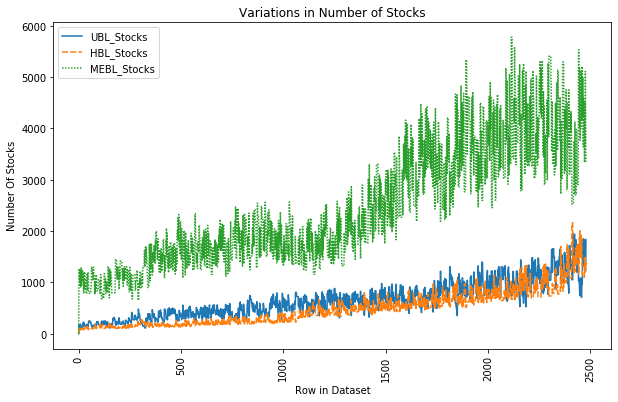

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(data=d.iloc[:2481,1:4])
plt.xticks(rotation=90)
plt.xlabel('Row in Dataset')
plt.ylabel('Number Of Stocks')
plt.title('Variations in Number of Stocks')
plt.legend(['UBL_Stocks','HBL_Stocks','MEBL_Stocks'],loc='upper left')

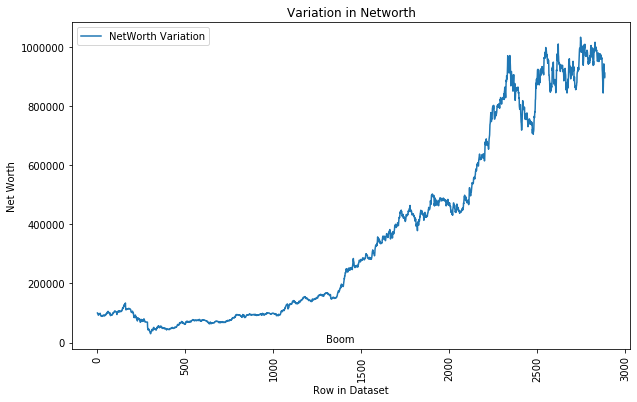

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=d.iloc[:,16])
plt.xticks(rotation=90)
plt.xlabel('Row in Dataset')
plt.ylabel('Net Worth')
plt.title('Variation in Networth')
plt.text(x=1300,y=(.2*(10^7)),s='Boom')
plt.legend(['NetWorth Variation'],loc='upper left')

## Why 2013 Boom?

### IMF Support relief Programme

![IMF Relief Programme](IMF_PRESS_CUT.png)

### CPEC

![Press Release](CPEC.png)

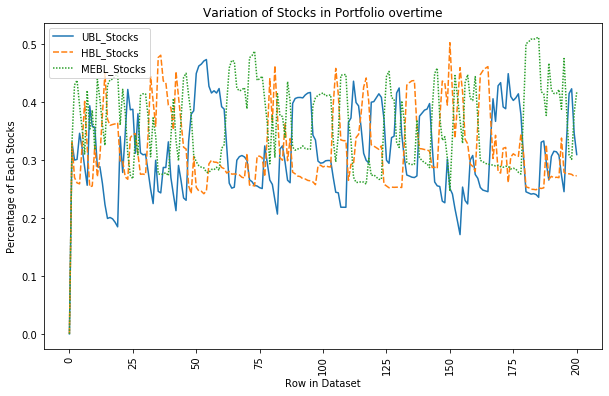

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(data=d.iloc[:201,8:11])
plt.xticks(rotation=90)
plt.xlabel('Row in Dataset')
plt.ylabel('Percentage of Each Stocks')
plt.title('Variation of Stocks in Portfolio overtime')
plt.legend(['UBL_Stocks','HBL_Stocks','MEBL_Stocks'],loc='upper left')

## Investment Portfolio

In [35]:
total_shares=nS1+nS2+nS3
X,nS1/total_shares,nS2/total_shares,nS3/total_shares

(109.00000000014552,
 0.22039923744351395,
 0.2421613786072001,
 0.537439383949286)

# Per Trade Data <a name='pt'></a>

In [40]:
Names=['ATRL','bahl','EPCL','FCCL','LUCK','MCB','MLCF','NETSOL','NML',
      'OGDC','PPL','PSO','SEARL','TRG']
i,dataframes=0,[]
for name in Names:
    dataframes.append(pd.read_csv('../per_trade_data/'+name+'.txt',delimiter='|',index_col='TRADE_ENTRY_DATE',
                        parse_dates=True))
    dataframes[i].reset_index(inplace=True)
    i+=1

# Improving DateTime Format <a name='dt'></a>

In [42]:
def Format(t):
    return t[:1]+':'+t[1:3]+':'+t[3:5]+'.'+t[5:] if len(t)==9 else t[:2]+':'+t[2:4]+':'+t[4:6]+'.'+t[6:]


In [43]:
def Combined(date,time):
    return date[:11]+Format(str(time))

In [44]:
def Formated(row):
    return Combined(str(row.TRADE_ENTRY_DATE),str(row.KATS_TIME))


In [ ]:
for i in range(14):
    dataframes[i]['Date_Time']=dataframes[i].apply(Formated,axis='columns')
    dataframes[i]['Date_Time']=pd.to_datetime(dataframes[i]['Date_Time'], infer_datetime_format=True)
    dataframes[i].to_csv('../Modified_Data/Modified_'+Names[i]+'.csv',index='Date_Time')

In [157]:
df=pd.read_csv('../Modified_Data/Modified_ATRL.csv',parse_dates=True,index_col='Date_Time',infer_datetime_format=True)
df.head()

,Unnamed: 0,TRADE_ENTRY_DATE,SYMBOL_CODE,KATS_TIME,TRADE_QTY,TRADE_RATE
Date_Time,,,,,,
2009-04-01 09:30:01.098700,0,2009-04-01,ATRL,930010987,100,82.0
2009-04-01 09:30:01.098800,1,2009-04-01,ATRL,930010988,1000,82.0
2009-04-01 09:30:01.098900,2,2009-04-01,ATRL,930010989,100,82.0
2009-04-01 09:30:01.099000,3,2009-04-01,ATRL,930010990,300,82.0
2009-04-01 09:30:01.099100,4,2009-04-01,ATRL,930010991,3700,82.0


Text(0.5, 1.0, 'TRADE_RATE OVER TIME')

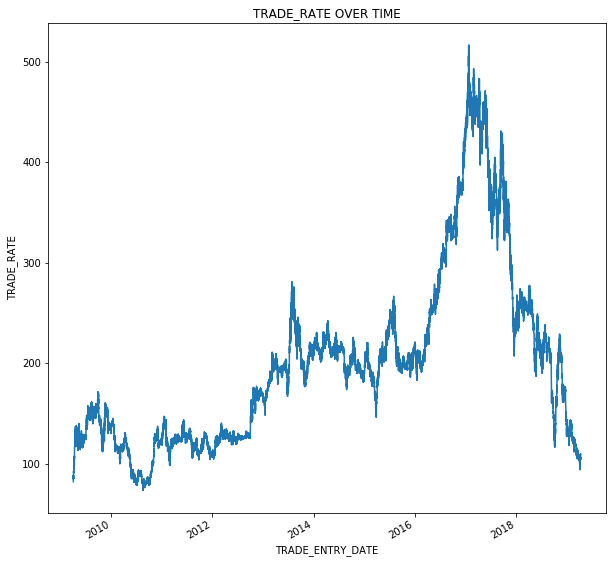

In [42]:
atrl['TRADE_RATE'][:].plot(kind='line',figsize=(10,10))
plt.ylabel('TRADE_RATE')
plt.title("TRADE_RATE OVER TIME")

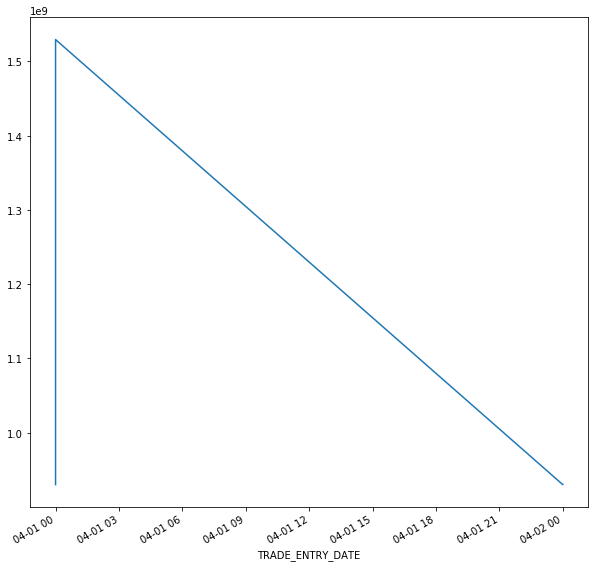

In [58]:
atrl['KATS_TIME'][:4570].plot(kind='line',figsize=(10,10))

In [106]:
for i in range(1,atrl.shape[0],60):
    with open('Modified_ATRL.csv','a') as rawfile:
        filewriter=csv.writer(rawfile)
        filewriter.writerow([atrl.index[i],atrl.KATS_TIME[i],atrl.TRADE_QTY[i],atrl.TRADE_RATE[i]])
            

In [110]:
df=pd.read_csv('Modified_ATRL.csv',index_col='TRADE_ENTRY_DATE',parse_dates=True)
df.head()

,KATS_TIME,TRADE_QTY,TRADE_RATE
TRADE_ENTRY_DATE,,,
2009-04-01,930010987,100,82.0
2009-04-01,930010988,1000,82.0
2009-04-01,930011048,100,82.0
2009-04-01,930020040,100,82.0
2009-04-01,930020100,1700,82.0


# Installing Gradient Boosted Tree model

In [94]:
!pip install XGBoost

In [ ]:
data=df

In [95]:
from sklearn import model_selection,tree
import xgboost as xgb
from sklearn import metrics

In [ ]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
    
X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','Open','High','Low','Volume']]

In [ ]:
X.head()

In [ ]:
X.Open=X.Open.astype('float')
X.High=X.High.astype('float')
X.Low=X.Low.astype('float')
X.Volume=X.Volume.astype('float')

In [ ]:
y=data[['Close']]

In [ ]:
y=y.astype('float')
X

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

# Training model

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train)

In [ ]:
yhat=reg.predict(X_test)

In [ ]:
#sns.lineplot(data=yhat)
sns.lineplot(data=y_test)

In [ ]:
sns.lineplot(data=yhat)


In [ ]:
metrics.mean_squared_error(y_test,yhat)

In [ ]:
yhat=reg.predict(X_train)

In [ ]:
sns.lineplot(data=yhat)

In [ ]:
sns.lineplot(data=y_test)